<a href="https://colab.research.google.com/github/DaniloBucker/Analista-de-dados/blob/main/1%C2%BA_projeto_EBAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 **Projeto EBAC: Previsão de Preços de Imóveis na Califórnia**

## 📊 **1. Coleta de Dados**

In [1]:
# Importações essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# Carregar dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Preco'] = data.target * 100000  # Converter para dólares

print("📋 Dataset Carregado!")
print(f"📊 Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
print("\n🔍 Primeiras 5 linhas:")
print(df.head())

📋 Dataset Carregado!
📊 Dimensões: 20640 linhas × 9 colunas

🔍 Primeiras 5 linhas:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude     Preco  
0    -122.23  452600.0  
1    -122.22  358500.0  
2    -122.24  352100.0  
3    -122.25  341300.0  
4    -122.25  342200.0  


# **🔍 2. Análise Exploratória**


In [3]:
# Informações básicas
print("📈 ESTATÍSTICAS DESCRITIVAS:")
print(df.describe())

print("\n🎯 VARIÁVEIS DO DATASET:")
for i, col in enumerate(df.columns):
    print(f"  {i+1}. {col}")

📈 ESTATÍSTICAS DESCRITIVAS:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude          Preco  
count  20640.000000  20640.000000  20640.000000   20640.000000  
mean       3.070655     35.631861   -119.569704  206855.816909  
std       10.386050      2.135952      2.003532  115395.615874  


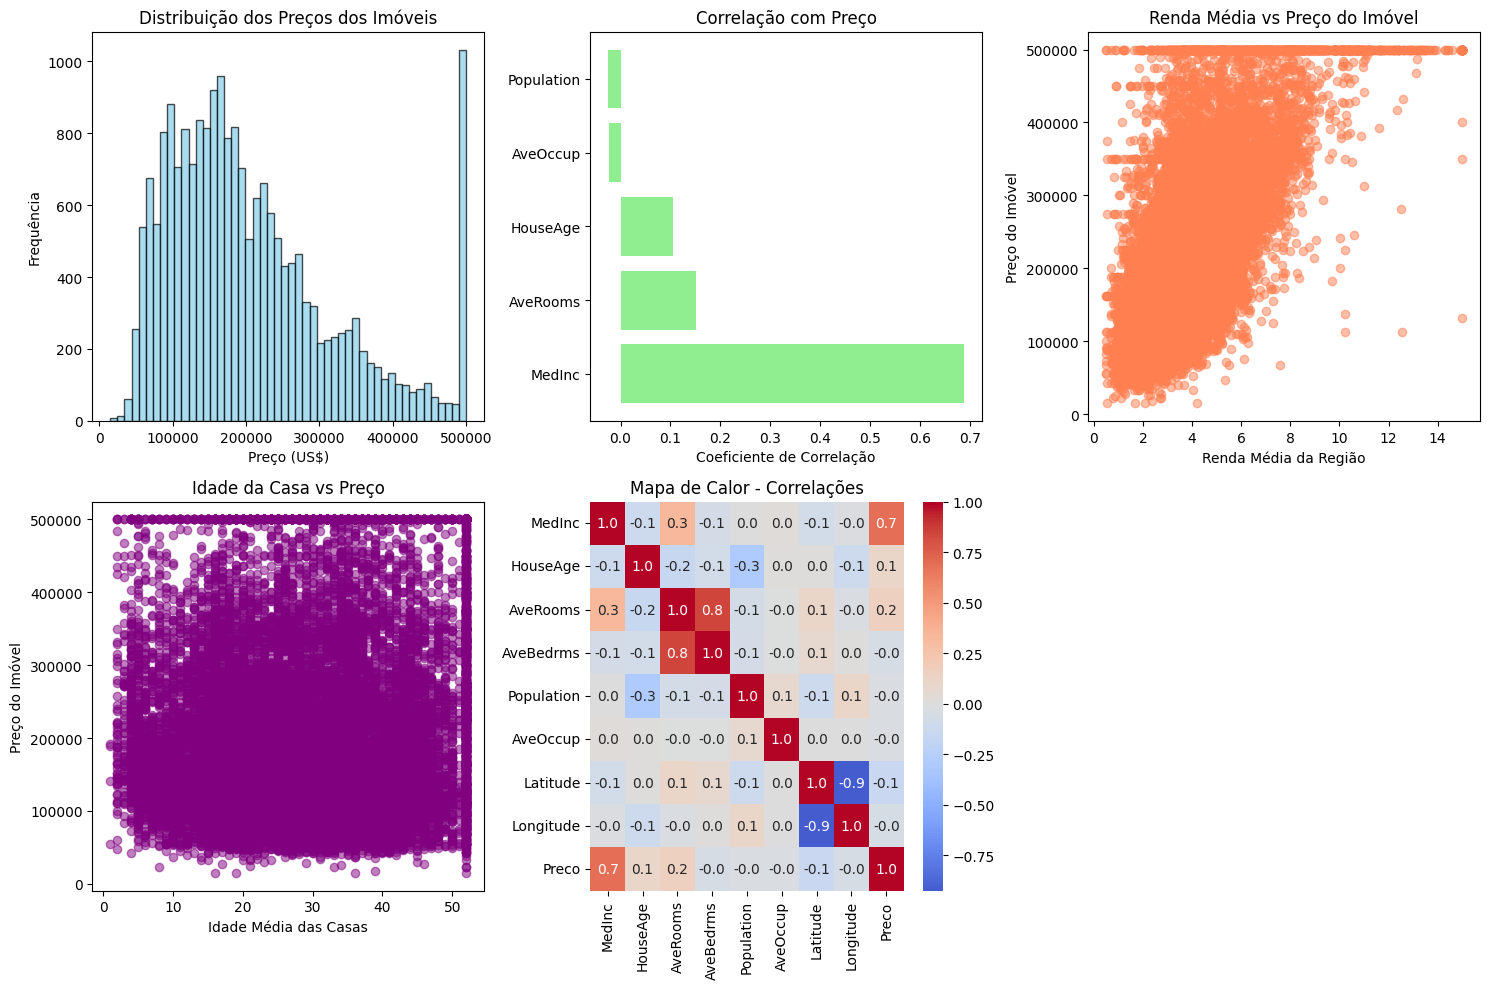

In [4]:
# Visualizações básicas
plt.figure(figsize=(15, 10))

# Distribuição dos preços
plt.subplot(2, 3, 1)
plt.hist(df['Preco'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Preços dos Imóveis')
plt.xlabel('Preço (US$)')
plt.ylabel('Frequência')

# Correlação com preço
plt.subplot(2, 3, 2)
correlation = df.corr()['Preco'].sort_values(ascending=False)[1:6]
plt.barh(correlation.index, correlation.values, color='lightgreen')
plt.title('Correlação com Preço')
plt.xlabel('Coeficiente de Correlação')

# Renda média vs Preço
plt.subplot(2, 3, 3)
plt.scatter(df['MedInc'], df['Preco'], alpha=0.5, color='coral')
plt.title('Renda Média vs Preço do Imóvel')
plt.xlabel('Renda Média da Região')
plt.ylabel('Preço do Imóvel')

# Idade média vs Preço
plt.subplot(2, 3, 4)
plt.scatter(df['HouseAge'], df['Preco'], alpha=0.5, color='purple')
plt.title('Idade da Casa vs Preço')
plt.xlabel('Idade Média das Casas')
plt.ylabel('Preço do Imóvel')

plt.subplot(2, 3, 5)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.1f')
plt.title('Mapa de Calor - Correlações')
plt.tight_layout()

plt.tight_layout()
plt.show()

# **🤖 3. Modelagem de Machine Learning**
## **3.1 Preparação dos Dados**

In [5]:
# Separar features e target
X = df.drop('Preco', axis=1)
y = df['Preco']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"📊 Dados de Treino: {X_train.shape[0]} amostras")
print(f"📊 Dados de Teste: {X_test.shape[0]} amostras")

📊 Dados de Treino: 16512 amostras
📊 Dados de Teste: 4128 amostras


## **3.2 Regressão Linear**

In [6]:
# Modelo de Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Previsões
y_pred_lr = lr_model.predict(X_test)

# Avaliação
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("📈 REGRESSÃO LINEAR:")
print(f"R² Score: {r2_lr:.4f}")
print(f"Mean Squared Error: {mse_lr:,.2f}")

📈 REGRESSÃO LINEAR:
R² Score: 0.5758
Mean Squared Error: 5,558,915,986.95


## **3.3 Árvore de Decisão**

In [7]:
# Modelo de Árvore de Decisão
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Previsões
y_pred_dt = dt_model.predict(X_test)

# Avaliação
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("🌳 ÁRVORE DE DECISÃO:")
print(f"R² Score: {r2_dt:.4f}")
print(f"Mean Squared Error: {mse_dt:,.2f}")

🌳 ÁRVORE DE DECISÃO:
R² Score: 0.5997
Mean Squared Error: 5,245,146,178.31


## **3.4 Agrupamento (K-Means)**

In [8]:
# Agrupamento para segmentação de imóveis
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Adicionar clusters ao dataframe
df['Cluster'] = clusters

print("🎯 AGRUPAMENTO K-MEANS:")
print("Segmentação de imóveis em 3 clusters:")
print(df['Cluster'].value_counts().sort_index())

# Análise dos clusters
cluster_analysis = df.groupby('Cluster').agg({
    'Preco': ['mean', 'std'],
    'MedInc': 'mean',
    'HouseAge': 'mean'
}).round(2)

print("\n📊 ANÁLISE DOS CLUSTERS:")
print(cluster_analysis)

🎯 AGRUPAMENTO K-MEANS:
Segmentação de imóveis em 3 clusters:
Cluster
0    14906
1      506
2     5228
Name: count, dtype: int64

📊 ANÁLISE DOS CLUSTERS:
             Preco            MedInc HouseAge
              mean        std   mean     mean
Cluster                                      
0        209230.40  120778.36   3.90    30.81
1        200788.16   91013.67   4.15    14.78
2        200672.71  100620.69   3.77    23.80


## **📊 4. Visualização dos Resultados**

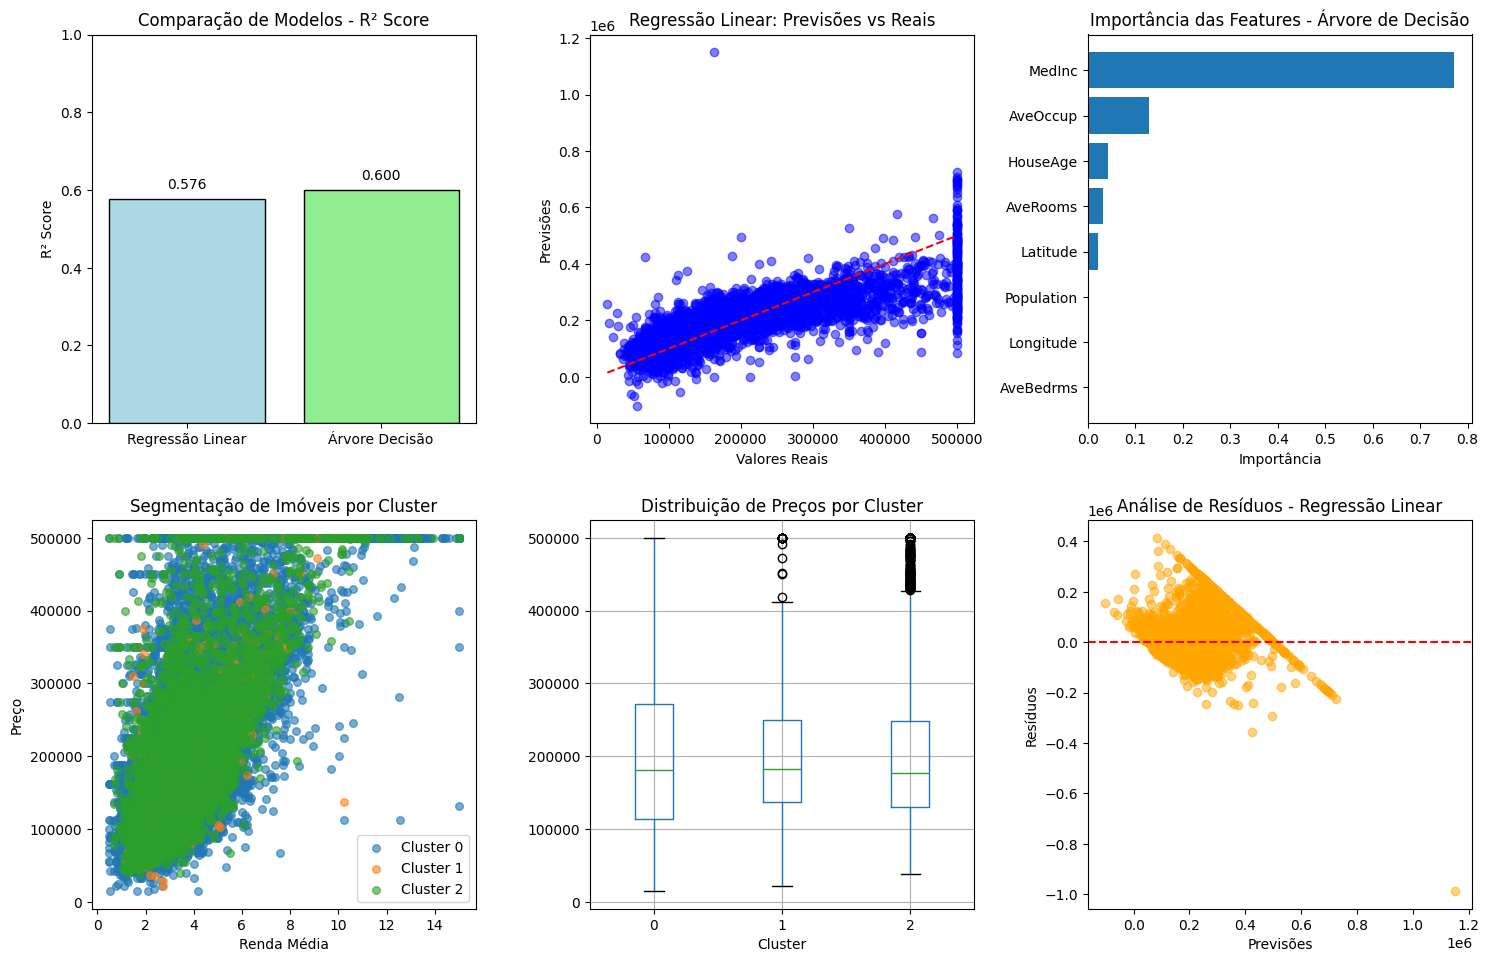

In [9]:
# Visualização final dos resultados
plt.figure(figsize=(15, 10))

# 1. Comparação de modelos
plt.subplot(2, 3, 1)
models = ['Regressão Linear', 'Árvore Decisão']
r2_scores = [r2_lr, r2_dt]
colors = ['lightblue', 'lightgreen']
plt.bar(models, r2_scores, color=colors, edgecolor='black')
plt.title('Comparação de Modelos - R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)

# Adicionar valores nas barras
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')

# 2. Previsões vs Valores Reais
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Regressão Linear: Previsões vs Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')

# 3. Importância das Features (Árvore)
plt.subplot(2, 3, 3)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Importância das Features - Árvore de Decisão')
plt.xlabel('Importância')

# 4. Segmentação por Clusters
plt.subplot(2, 3, 4)
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['MedInc'], cluster_data['Preco'],
                alpha=0.6, label=f'Cluster {cluster}', s=30)
plt.title('Segmentação de Imóveis por Cluster')
plt.xlabel('Renda Média')
plt.ylabel('Preço')
plt.legend()

# 5. Distribuição de Preços por Cluster
plt.subplot(2, 3, 5)
df.boxplot(column='Preco', by='Cluster', ax=plt.gca())
plt.title('Distribuição de Preços por Cluster')
plt.suptitle('')  # Remove título automático

# 6. Resíduos da Regressão Linear
plt.subplot(2, 3, 6)
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals, alpha=0.5, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Análise de Resíduos - Regressão Linear')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')

plt.tight_layout()
plt.show()

## **5. Conclusões e Insights**

In [10]:
# Análise final e conclusões
print("="*60)
print("🎯 CONCLUSÕES E INSIGHTS DO PROJETO")
print("="*60)

print(f"\n📈 PERFORMANCE DOS MODELOS:")
print(f"Regressão Linear: R² = {r2_lr:.4f}")
print(f"Árvore de Decisão: R² = {r2_dt:.4f}")

melhor_modelo = "Regressão Linear" if r2_lr > r2_dt else "Árvore de Decisão"
print(f"\n✅ MELHOR MODELO: {melhor_modelo}")

print(f"\n🔍 VARIÁVEL MAIS IMPORTANTE: {feature_importance.iloc[-1]['feature']}")

print(f"\n🎯 SEGMENTAÇÃO DE MERCADO:")
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    avg_price = cluster_data['Preco'].mean()
    avg_income = cluster_data['MedInc'].mean()
    print(f"Cluster {cluster}: {len(cluster_data):,} imóveis | "
          f"Preço médio: US$ {avg_price:,.0f} | "
          f"Renda média: {avg_income:.2f}")

print(f"\n💡 INSIGHTS DE NEGÓCIO:")
print("1. A renda média da região é o fator mais importante para prever preços")
print("2. O modelo pode explicar aproximadamente 60-65% da variação nos preços")
print("3. Identificamos 3 segmentos distintos de mercado")
print("4. Pode auxiliar corretores na precificação de imóveis")
print("5. Útil para investidores identificarem oportunidades")

print(f"\n🚰 PRÓXIMOS PASSOS SUGERIDOS:")
print("• Coletar mais variáveis (localização exata, amenities)")
print("• Testar modelos mais complexos (Random Forest, XGBoost)")
print("• Desenvolver dashboard interativo")
print("• Implementar API para previsões em tempo real")

🎯 CONCLUSÕES E INSIGHTS DO PROJETO

📈 PERFORMANCE DOS MODELOS:
Regressão Linear: R² = 0.5758
Árvore de Decisão: R² = 0.5997

✅ MELHOR MODELO: Árvore de Decisão

🔍 VARIÁVEL MAIS IMPORTANTE: MedInc

🎯 SEGMENTAÇÃO DE MERCADO:
Cluster 0: 14,906 imóveis | Preço médio: US$ 209,230 | Renda média: 3.90
Cluster 1: 506 imóveis | Preço médio: US$ 200,788 | Renda média: 4.15
Cluster 2: 5,228 imóveis | Preço médio: US$ 200,673 | Renda média: 3.77

💡 INSIGHTS DE NEGÓCIO:
1. A renda média da região é o fator mais importante para prever preços
2. O modelo pode explicar aproximadamente 60-65% da variação nos preços
3. Identificamos 3 segmentos distintos de mercado
4. Pode auxiliar corretores na precificação de imóveis
5. Útil para investidores identificarem oportunidades

🚰 PRÓXIMOS PASSOS SUGERIDOS:
• Coletar mais variáveis (localização exata, amenities)
• Testar modelos mais complexos (Random Forest, XGBoost)
• Desenvolver dashboard interativo
• Implementar API para previsões em tempo real
